In [1]:
# caveat: I removed wrapping views in ACEtk to make ENDFtk and ACEtk work together
import ENDFtk
import ACEtk
import scion

import matplotlib.pyplot as plot
%matplotlib notebook

In [2]:
# the files we want to look at
endffile = '../performance/pu239.endf'
acefile = '/Users/ftuser/Desktop/Lib80x/Lib80x/Pu/94239.800nc'

In [3]:
# open the ENDF and ACE file
tape = ENDFtk.tree.Tape.from_file( endffile )
endf = tape.materials.front().parse()
ace = ACEtk.ContinuousEnergyTable.from_file( acefile )

In [4]:
# convert to the proper Legendre coefficients
def convert( coefficients ) :
    
    converted = [ 0.5 ]
    for i in range( 1, len( coefficients ) + 1 ) :
        
        converted.append( ( 2 * i + 1 ) / 2 * coefficients[i - 1] )
    
    return converted

### Pu 239 elastic angular distribution data for 14 MeV

In [5]:
# retrieve the ENDF data for 14 MeV
endf_elastic = endf.file( 4 ).section( 2 ).distributions

index = -4

incident_energy = endf_elastic.incident_energies[index]
endf_legendre = scion.math.LegendreSeries( convert( endf_elastic.angular_distributions[index].coefficients ) )

print( 'E_in: ', incident_energy )
print( 'order: ', endf_legendre.order )

E_in:  14000000.0
order:  20


In [6]:
# retrieve the ACE pdf/cdf for 15 MeV (the one based on legendre polynomials and the duplicate tabulated one)
# both are added to the ACE file - not something that is required I think
ace_elastic = ace.angular_distribution_block.angular_distribution_data(0)

index = -4

incident_energy = ace_elastic.incident_energies[index]
ace_legendre = ace_elastic.distributions[index]

<IPython.core.display.Javascript object>


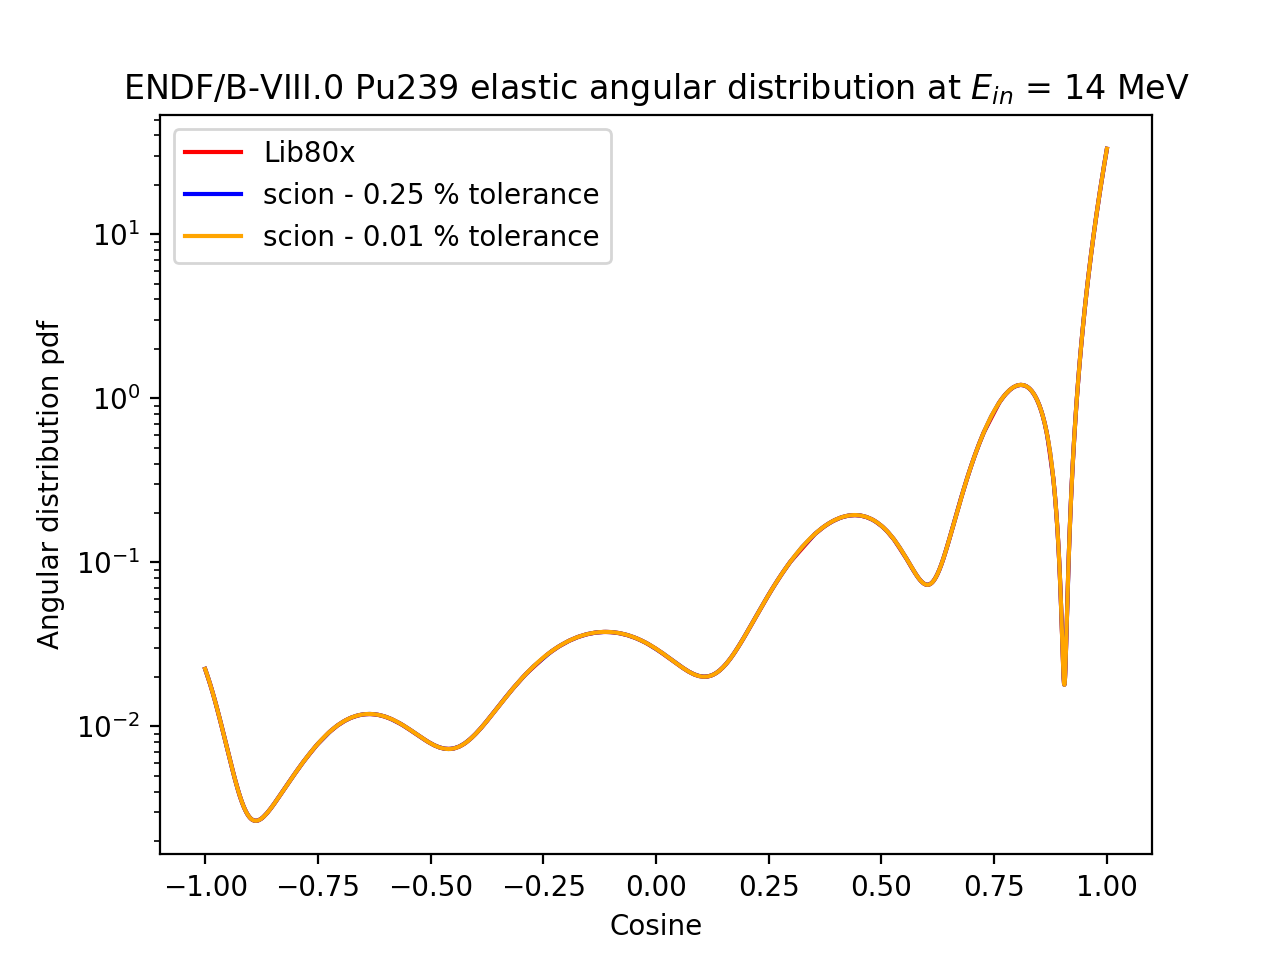

In [7]:
# linearise the pdf at different tolerances
plot1 = endf_legendre.linearise( scion.linearisation.ToleranceConvergence( .0025 ) )
plot2 = endf_legendre.linearise( scion.linearisation.ToleranceConvergence( .0001 ) )

# plot the data
plot.figure()
plot.plot( ace_legendre.cosines, ace_legendre.pdf, label = 'Lib80x', color = 'red', linewidth = 1.5 )
plot.plot( plot1.x, plot1.y, label = 'scion - 0.25 % tolerance', color = 'blue', linewidth = 1.5 )
plot.plot( plot2.x, plot2.y, label = 'scion - 0.01 % tolerance', color = 'orange', linewidth = 1.5 )
plot.xlabel( 'Cosine' )
plot.ylabel( 'Angular distribution pdf' )
plot.title( 'ENDF/B-VIII.0 Pu239 elastic angular distribution at $E_{in}$ = 14 MeV' )
plot.yscale( 'log' )
plot.legend()
plot.show()

In [8]:
print( len( ace_legendre.cosines ) )
print( len( plot1.x ) )
print( len( plot2.x ) )

241
294
1438


<IPython.core.display.Javascript object>


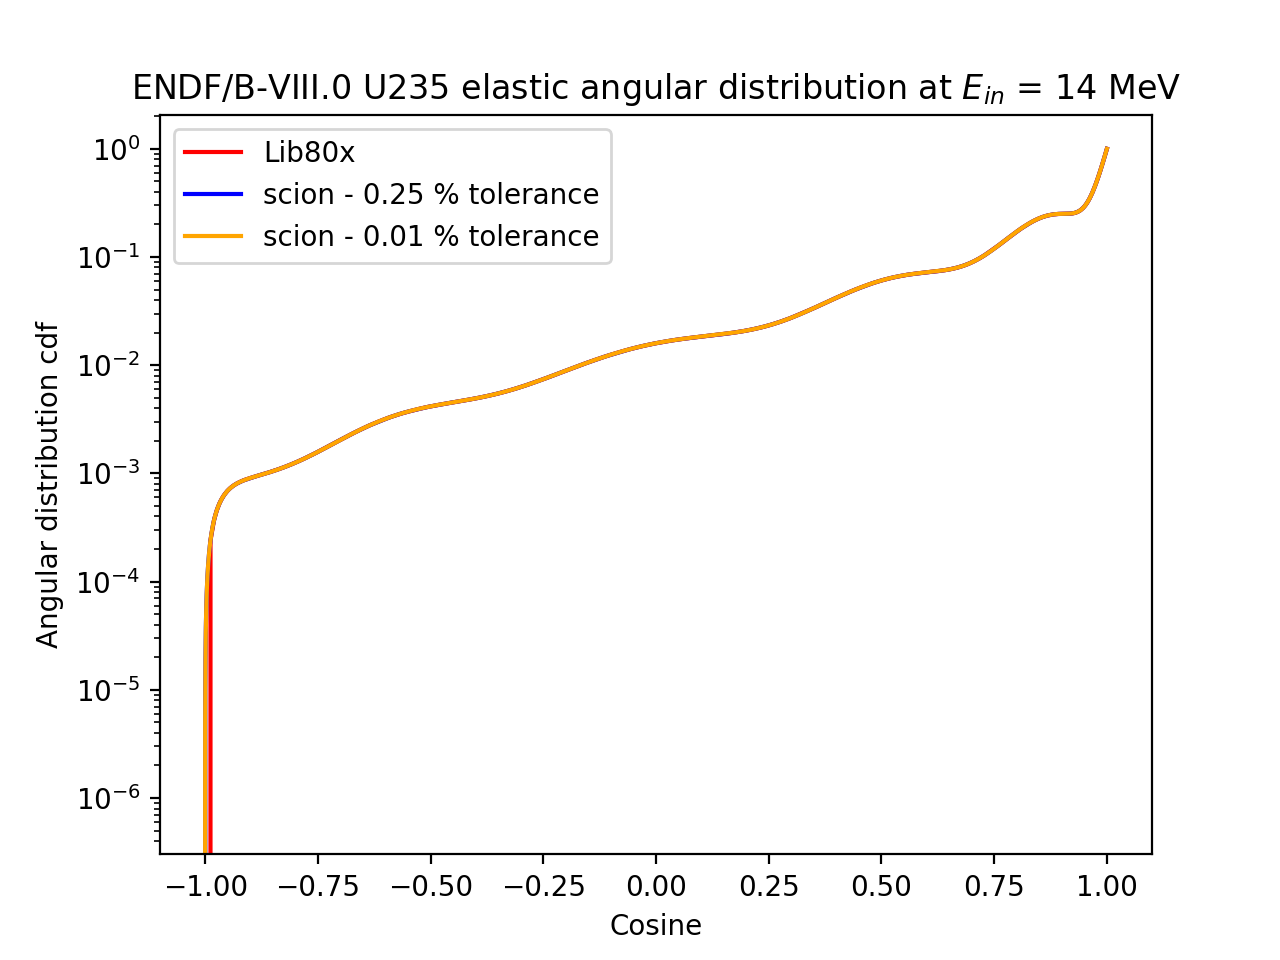

In [9]:
# we can linearise the cdf directly based on the primitive of the pdf as a Legendre series
endf_cdf = endf_legendre.primitive( -1.0 ) # the integral[-1,x] of the endf_legendre series

plot1 = endf_cdf.linearise( scion.linearisation.ToleranceConvergence( .0025 ) )
plot2 = endf_cdf.linearise( scion.linearisation.ToleranceConvergence( .0001 ) )

# plot the data
plot.figure()
plot.plot( ace_legendre.cosines, ace_legendre.cdf, label = 'Lib80x', color = 'red', linewidth = 1.5 )
plot.plot( plot1.x, plot1.y, label = 'scion - 0.25 % tolerance', color = 'blue', linewidth = 1.5 )
plot.plot( plot2.x, plot2.y, label = 'scion - 0.01 % tolerance', color = 'orange', linewidth = 1.5 )
plot.xlabel( 'Cosine' )
plot.ylabel( 'Angular distribution cdf' )
plot.title( 'ENDF/B-VIII.0 U235 elastic angular distribution at $E_{in}$ = 14 MeV' )
plot.yscale( 'log' )
plot.legend()
plot.show()

In [10]:
# fun fact: the cdf is a lot smoother than the pdf so we need a lot less points to represent it as the pdf
# at the same tolerances
print( len( ace_legendre.cosines ) )
print( len( plot1.x ) )
print( len( plot2.x ) )

241
126
593


In [11]:
# we can verify that the pdf goes NOT below zero in [-1,1] by calculating the roots of the pdf on the real axis
print( 'roots: ', endf_legendre.roots() )

roots:  [-1.4073996847771768, -1.0678058218276212]


In [12]:
# we can verify that the cdf is monotonically increasing in [-1,1] by calculating the roots of the 
# first derivative of the cdf on the real axis and showing that the derivative is always above zero
# and yes: I know that boils down to calculating the roots of the pdf but I'm flexing the interface here :-)
print( 'roots: ', endf_legendre.primitive( -1 ).derivative().roots() )

roots:  [-1.4073996847744774, -1.06780582182789]


### Pu 239 elastic angular distribution data for 20 MeV

In [13]:
# retrieve the ENDF data for 14 MeV
endf_elastic = endf.file( 4 ).section( 2 ).distributions

index = -1

incident_energy = endf_elastic.incident_energies[index]
endf_legendre = scion.math.LegendreSeries( convert( endf_elastic.angular_distributions[index].coefficients ) )

print( 'E_in: ', incident_energy )
print( 'order: ', endf_legendre.order )

E_in:  20000000.0
order:  20


In [14]:
# retrieve the ACE pdf/cdf for 15 MeV (the one based on legendre polynomials and the duplicate tabulated one)
# both are added to the ACE file - not something that is required I think
ace_elastic = ace.angular_distribution_block.angular_distribution_data(0)

index = -1

incident_energy = ace_elastic.incident_energies[index]
ace_legendre = ace_elastic.distributions[index]

<IPython.core.display.Javascript object>


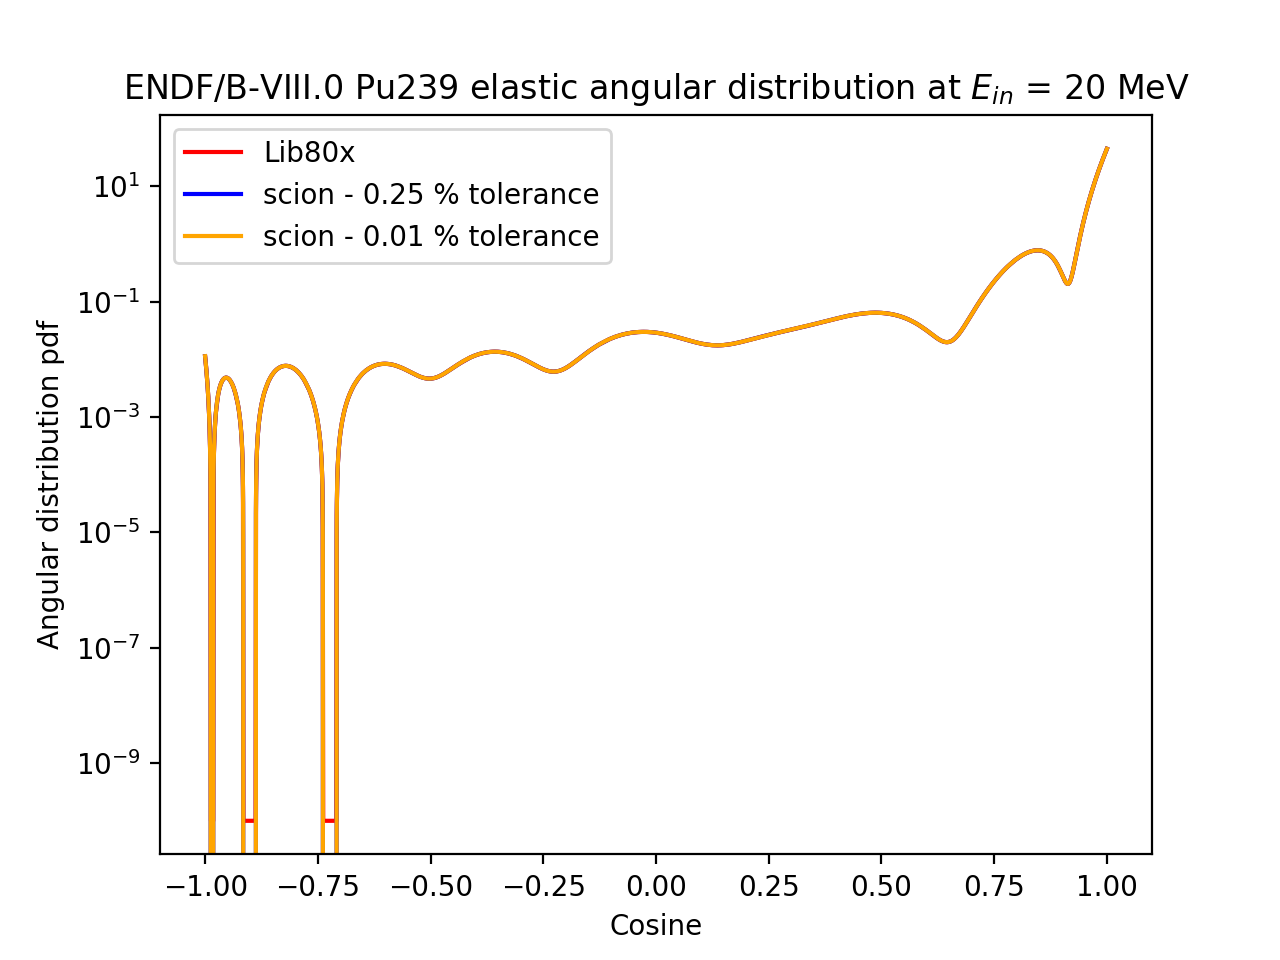

In [15]:
# linearise the pdf at different tolerances - this one looks weird because it goes negative
plot1 = endf_legendre.linearise( scion.linearisation.ToleranceConvergence( .0025 ) )
plot2 = endf_legendre.linearise( scion.linearisation.ToleranceConvergence( .0001 ) )

# plot the data
plot.figure()
plot.plot( ace_legendre.cosines, ace_legendre.pdf, label = 'Lib80x', color = 'red', linewidth = 1.5 )
plot.plot( plot1.x, plot1.y, label = 'scion - 0.25 % tolerance', color = 'blue', linewidth = 1.5 )
plot.plot( plot2.x, plot2.y, label = 'scion - 0.01 % tolerance', color = 'orange', linewidth = 1.5 )
plot.xlabel( 'Cosine' )
plot.ylabel( 'Angular distribution pdf' )
plot.title( 'ENDF/B-VIII.0 Pu239 elastic angular distribution at $E_{in}$ = 20 MeV' )
plot.yscale( 'log' )
plot.legend()
plot.show()

In [16]:
print( len( ace_legendre.cosines ) )
print( len( plot1.x ) )
print( len( plot2.x ) )

350
575
2898


<IPython.core.display.Javascript object>


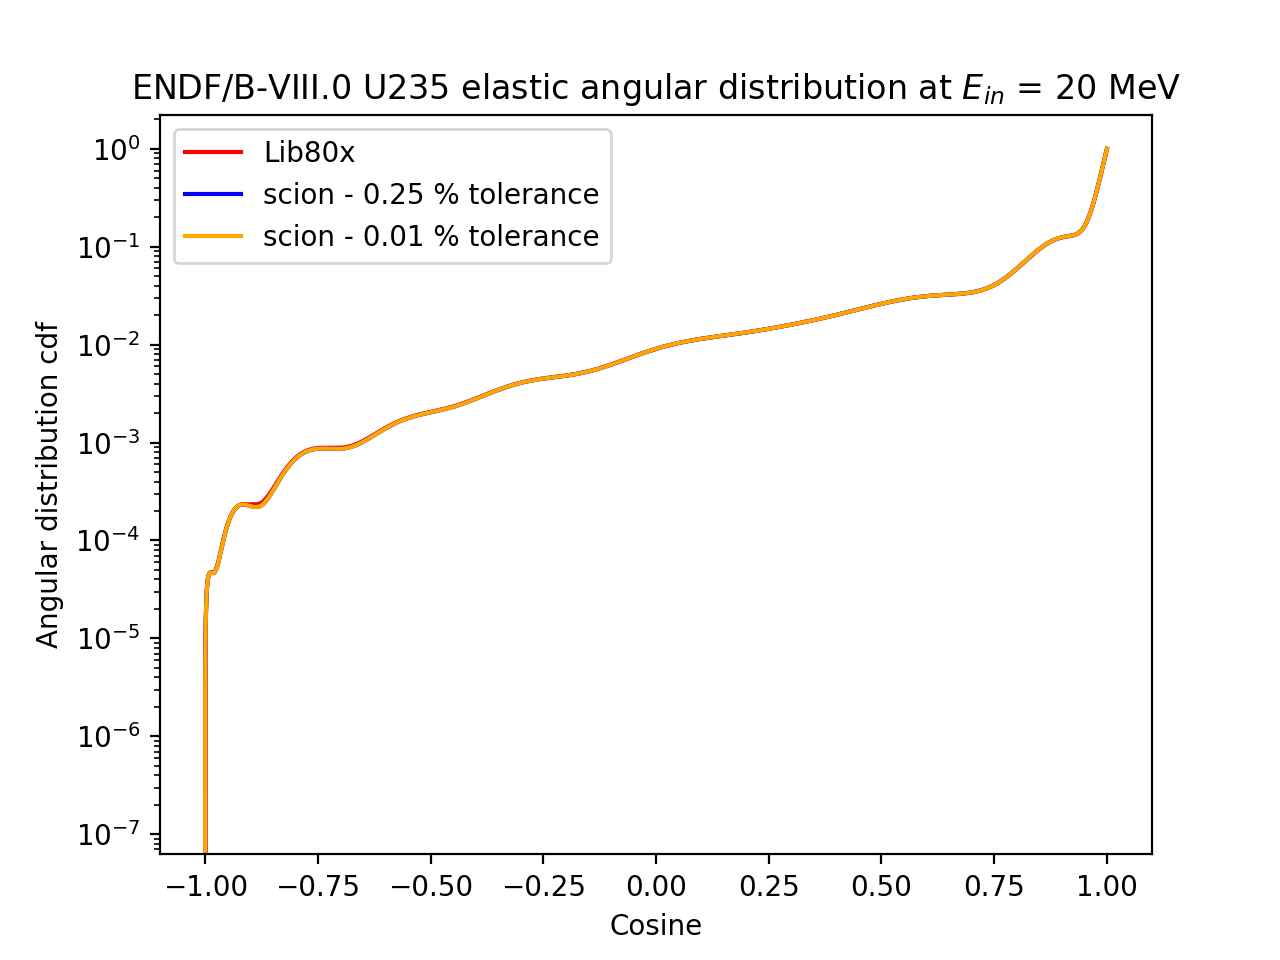

In [17]:
# we can linearise the cdf directly based on the primitive of the pdf as a Legendre series
endf_cdf = endf_legendre.primitive( -1.0 ) # the integral[-1,x] of the endf_legendre series

plot1 = endf_cdf.linearise( scion.linearisation.ToleranceConvergence( .0025 ) )
plot2 = endf_cdf.linearise( scion.linearisation.ToleranceConvergence( .0001 ) )

# plot the data
plot.figure()
plot.plot( ace_legendre.cosines, ace_legendre.cdf, label = 'Lib80x', color = 'red', linewidth = 1.5 )
plot.plot( plot1.x, plot1.y, label = 'scion - 0.25 % tolerance', color = 'blue', linewidth = 1.5 )
plot.plot( plot2.x, plot2.y, label = 'scion - 0.01 % tolerance', color = 'orange', linewidth = 1.5 )
plot.xlabel( 'Cosine' )
plot.ylabel( 'Angular distribution cdf' )
plot.title( 'ENDF/B-VIII.0 U235 elastic angular distribution at $E_{in}$ = 20 MeV' )
plot.yscale( 'log' )
plot.legend()
plot.show()

In [18]:
# fun fact: the cdf is a lot smoother than the pdf so we need a lot less points to represent it as the pdf
# at the same tolerances
print( len( ace_legendre.cosines ) )
print( len( plot1.x ) )
print( len( plot2.x ) )

350
184
987


In [19]:
# we can verify that the pdf goes below zero in [-1,1] by calculating the roots of the pdf on the real axis
print( 'roots: ', endf_legendre.roots() )

roots:  [-0.9876525822559125, -0.9819548375628138, -0.9154315852745969, -0.8874534172532146, -0.7387579969435945, -0.708387406663399]


In [20]:
# we can verify that the cdf is NOT monotonically increasing in [-1,1] by calculating the roots of the 
# first derivative of the cdf on the real axis and showing that the derivative is always above zero
# and yes: I know that boils down to calculating the roots of the pdf but I'm flexing the interface here :-)
print( 'roots: ', endf_legendre.primitive( -1 ).derivative().roots() )

roots:  [-0.9876525822559142, -0.9819548375628142, -0.9154315852746021, -0.8874534172532136, -0.7387579969435967, -0.7083874066633988]
